### **HOMEWORK 1**  <h3>

### **Exercício 1**  <h3>

Inicialmente temos que ler o DataSet. 

In [8]:
import pandas as pd
from scipy.io.arff import loadarff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

De seguida, é necessário separar os dados em dois grupos: um para as features (variáveis de input) e outro para as classes (variáveis de output).

In [9]:
y = df['class']
X = df.drop('class', axis=1)

Com a função f_classif, é possível calcular o F-statistic e o p-value para cada feature.

In [10]:
fimportance = f_classif(X, y)
fstat = fimportance[0]
pval = fimportance[1]

Para identificar as variáveis de input com o maior e menor poder discriminativo, cria-se um DataFrame em que cada linha corresponde a uma feature e as colunas correspondem ao F-statistic e ao p-value dessa feature. De seguida ordenou-se esse DataFrame pelo F-statistic(crescente). Selecionou-se a primeira e a última linha do DataFrame, que correspondem às features com maior e menor poder discriminativo, respetivamente.

In [11]:
fstat_df = pd.DataFrame({'F-statistic': fstat, 'p-value': pval})
fstat_df.index = X.columns                                 # Set the index to the variable names
fstat_df = fstat_df.sort_values(by=['F-statistic'], ascending=False)
print(fstat_df)
print("The variables with the highest and lowest F-statistic are degree_spondylolisthesis and pelvic_radius, respectively.")

                          F-statistic       p-value
degree_spondylolisthesis   119.122881  5.114732e-39
lumbar_lordosis_angle      114.982840  5.357329e-38
pelvic_incidence            98.539709  8.752849e-34
sacral_slope                89.643953  2.175670e-31
pelvic_tilt                 21.299194  2.176879e-09
pelvic_radius               16.866935  1.121996e-07
The variables with the highest and lowest F-statistic are degree_spondylolisthesis and pelvic_radius, respectively.


Por fim, há que desenhar as funções de densidade de probabilidade condicionadas às 3 classes de output, para as duas variáveis de input identificadas acima. Foi utilizada a função kdeplot do seaborn para aproximar os valores que estariam contidos num histograma (função massa de probabilidade) a uma função de densidade de probabilidade, pelo método de kernel density estimation.

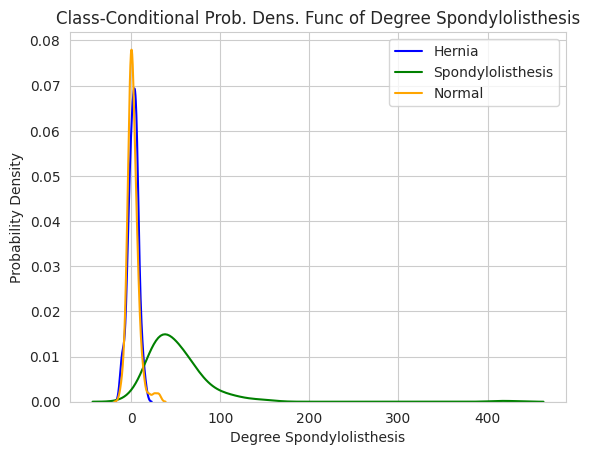

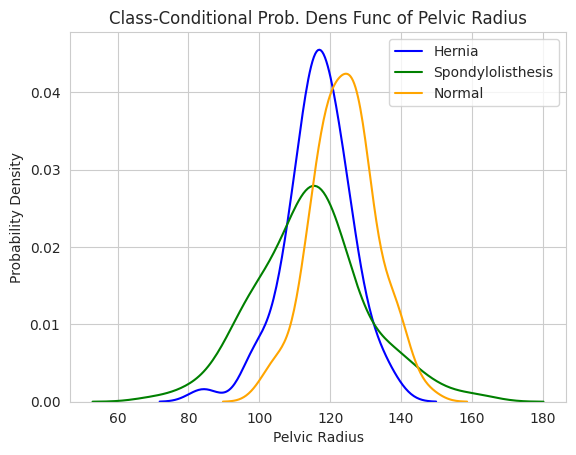

In [12]:
sns.set_style('whitegrid')
sns.kdeplot(df['degree_spondylolisthesis'][df['class'] == 'Hernia'], fill = False, label= 'Hernia', color = 'blue')
sns.kdeplot(df['degree_spondylolisthesis'][df['class'] == 'Spondylolisthesis'], fill = False, label='Spondylolisthesis', color = 'green')
sns.kdeplot(df['degree_spondylolisthesis'][df['class'] == 'Normal'], fill = False, label='Normal', color = 'orange')
plt.xlabel('Degree Spondylolisthesis')
plt.ylabel('Probability Density')
plt.title('Class-Conditional Prob. Dens. Func of Degree Spondylolisthesis')
plt.legend()
plt.show()

sns.set_style('whitegrid')
sns.kdeplot(df['pelvic_radius'][df['class'] == 'Hernia'], fill=False, label='Hernia', color = 'blue')
sns.kdeplot(df['pelvic_radius'][df['class'] == 'Spondylolisthesis'], fill=False, label='Spondylolisthesis', color = 'green')
sns.kdeplot(df['pelvic_radius'][df['class'] == 'Normal'], fill=False, label='Normal', color = 'orange')
plt.xlabel('Pelvic Radius')
plt.ylabel('Probability Density')
plt.title('Class-Conditional Prob. Dens Func of Pelvic Radius')
plt.legend()
plt.show()

### **Exercício 2**  <h3>

Primeiro fizemos o split treino/teste com 70% para treino e 30% para teste.

In [13]:
random_seed = 0

train_accuracies = []
test_accuracies = []

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

Queremos obter a accuracy para árvores com profundidade limite de 1 a 10, pelo que utilizámos um ciclo criando uma árvore de decisão em cada iteração, com a profundidade limite correspondente. Inicialmente treinámos a árvore com os dados de treino, obtendo os valores previstos para as target variables. Utilizando o output previsto e real de treino e de teste, calculámos as accuracies para cada profundidade limite.

In [ ]:
for depth_limit in depth_limits:
    clf = DecisionTreeClassifier(max_depth=depth_limit, random_state=random_seed)
    clf.fit(X_train, y_train)
    
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    train_accuracy = metrics.accuracy_score(y_pred_train, y_train)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = metrics.accuracy_score(y_pred_test, y_test)
    test_accuracies.append(test_accuracy)

Por fim, desenhamos um único gráfico com a accuracy de treino e teste para cada profundidade limite.

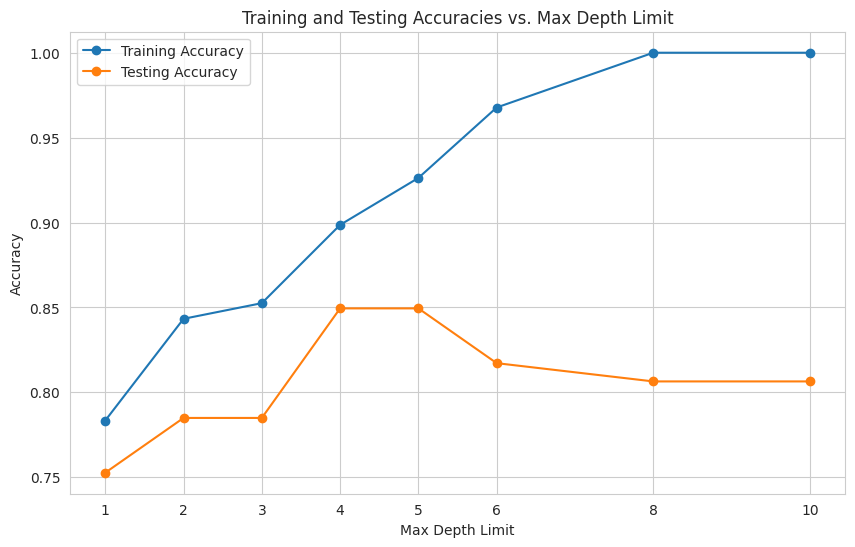

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Max Depth Limit')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Max Depth Limit')
plt.xticks(depth_limits)
plt.legend()
plt.show()

### **Exercício 3**  <h3>

Observando o gráfico obtido no exercício 2, verifica-se um crescimento da accuracy das observações de treino à medida que o limite de profundidade aumenta. A accuracy de treino atinge o valor de 1 para valores de limite de profundidade de 8 a 10. Contudo, para as observações de teste é visível um crescimento da accuracy até aos valores de depth limit intermédios (4 e 5), havendo um decréscimo progressivo desta após estes valores.

Para valores de depth limit pequenos (menores que 4), é expectável que a accuracy tanto das observações de treino como das de teste aumente, dado que uma maior profundidade da árvore implica a abrangência de um maior número de cenários possíveis. Contudo, para os valores de depth limit superiores (maiores que 5), a accuracy do treino continua a aumentar, enquanto a accuracy de teste diminui. Isto acontece devido ao facto da árvore entrar em overfitting, dado que esta se adapta muito aos dados treinados, perdendo a capacidade de generalização para eventuais acontecimentos que não sejam cobertos pelo treino.

### **Exercício 4**  <h3>

Fizémos um plot da de uma árvore com um mínimo de 20 indivíduos por folha, para evitar overfitting. Treinámos a árvore utilizando todos os dados como treino. De seguida, fizémos um plot da árvore.

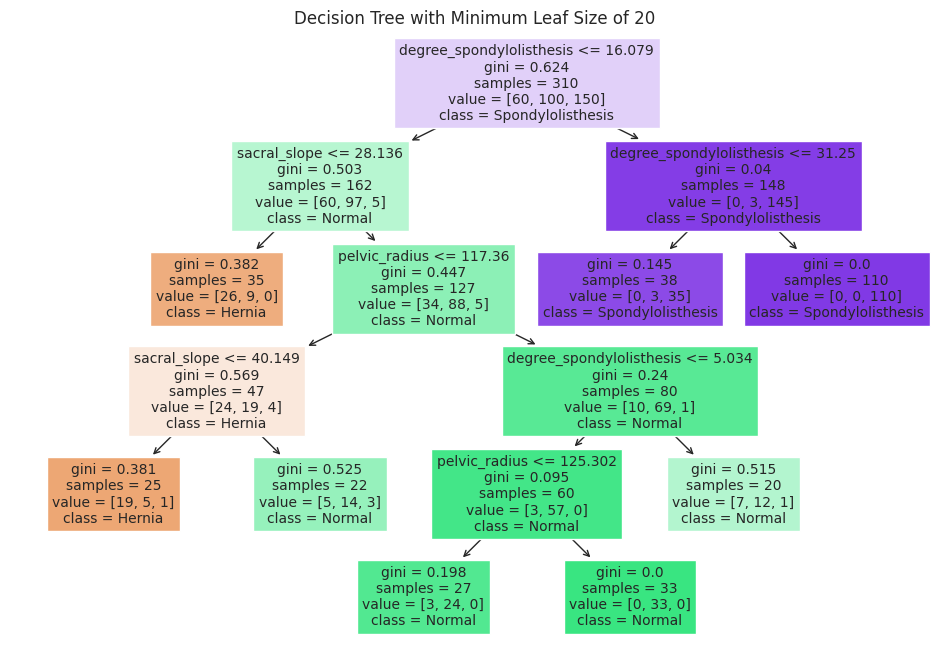

In [15]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=random_seed)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.columns, class_names=np.unique(y).astype(str), fontsize=10)
plt.title("Decision Tree with Minimum Leaf Size of 20")
plt.show()